<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/APIs/2_APIs_Series_Tiempo/ejercicios/ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Clase 1: ejercicios prácticos resueltos

In [92]:
!pip install markdown
!pip install arrow
!pip install seaborn
!pip install requests

Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple
Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple
Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple
Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple


In [93]:
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import arrow
import markdown
import requests
%matplotlib inline

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12, 8]

## Ejercicio 1: API de Series de Tiempo de Argentina 

* Genera una tabla y grafica la evolucion de los tipos de cambio ARS/USD de todas las entidades financieras (canal electronico, venta, 15hs).

In [94]:
BASE_SERIES_API = 'https://apis.datos.gob.ar/series/api/series/?ids={ids}&last=5000&format=csv'

tcs_api = BASE_SERIES_API.format(
    ids=",".join([
        'tc_usd_galicia_ev15',
        'tc_usd_supervielle_ev15',
        'tc_usd_itau_ev15',
        'tc_usd_macro_ev15',
        'tc_usd_piano_ev15',
        'tc_usd_credicoop_ev15',
        'tc_usd_bbva_ev15',
        'tc_usd_bna_ev15',
        'tc_usd_ibcambio_ev15',
        'tc_usd_patagonia_ev15',
        'tc_usd_hsbc_ev15',
        'tc_usd_brubank_ev15',
        'tc_usd_bullmarket_ev15',
        'tc_usd_santander_ev15',
        'tc_usd_hipotecario_ev15',
        'tc_usd_balanz_ev15',
    ])
)

print(tcs_api)

tcs = pd.read_csv(tcs_api)

https://apis.datos.gob.ar/series/api/series/?ids=tc_usd_galicia_ev15,tc_usd_supervielle_ev15,tc_usd_itau_ev15,tc_usd_macro_ev15,tc_usd_piano_ev15,tc_usd_credicoop_ev15,tc_usd_bbva_ev15,tc_usd_bna_ev15,tc_usd_ibcambio_ev15,tc_usd_patagonia_ev15,tc_usd_hsbc_ev15,tc_usd_brubank_ev15,tc_usd_bullmarket_ev15,tc_usd_santander_ev15,tc_usd_hipotecario_ev15,tc_usd_balanz_ev15&last=5000&format=csv


In [95]:
tcs['indice_tiempo'] = pd.to_datetime(tcs.indice_tiempo)
tcs = tcs.set_index('indice_tiempo')
tcs

,tc_ars_dolar_galicia_electronico_venta_15hs,tc_ars_dolar_supervielle_electronico_venta_15hs,tc_ars_dolar_itau_electronico_venta_15hs,tc_ars_dolar_macro_electronico_venta_15hs,tc_ars_dolar_piano_electronico_venta_15hs,tc_ars_dolar_credicoop_electronico_venta_15hs,tc_ars_dolar_bbva_electronico_venta_15hs,tc_ars_dolar_bna_electronico_venta_15hs,tc_ars_dolar_ibcambio_electronico_venta_15hs,tc_ars_dolar_patagonia_electronico_venta_15hs,tc_ars_dolar_hsbc_electronico_venta_15hs,tc_ars_dolar_brubank_electronico_venta_15hs,tc_ars_dolar_bullmarket_electronico_venta_15hs,tc_ars_dolar_santander_electronico_venta_15hs,tc_ars_dolar_hipotecario_electronico_venta_15hs,tc_ars_dolar_balanz_electronico_venta_15hs
indice_tiempo,,,,,,,,,,,,,,,,
2017-01-02,16.20,NaN,16.20,NaN,NaN,16.07,16.15,NaN,NaN,16.15,16.10,NaN,NaN,16.20,NaN,NaN
2017-01-03,16.15,NaN,16.15,NaN,NaN,16.07,16.15,NaN,NaN,NaN,16.10,NaN,NaN,16.20,NaN,NaN
2017-01-04,NaN,NaN,16.35,NaN,NaN,16.27,16.30,NaN,NaN,16.30,16.25,NaN,NaN,16.40,NaN,NaN
2017-01-05,16.25,NaN,16.25,NaN,NaN,16.17,16.15,NaN,NaN,16.15,16.15,NaN,NaN,16.25,NaN,NaN
2017-01-06,16.05,NaN,16.10,NaN,NaN,16.07,16.00,NaN,NaN,16.15,16.05,NaN,NaN,16.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17,79.75,79.5,79.60,80.0,79.022,79.20,79.79,79.20,NaN,79.50,79.60,79.5,NaN,79.50,NaN,NaN
2020-09-18,79.75,79.5,79.70,80.0,79.022,79.20,79.79,79.20,NaN,79.50,79.75,79.5,NaN,79.50,NaN,NaN
2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


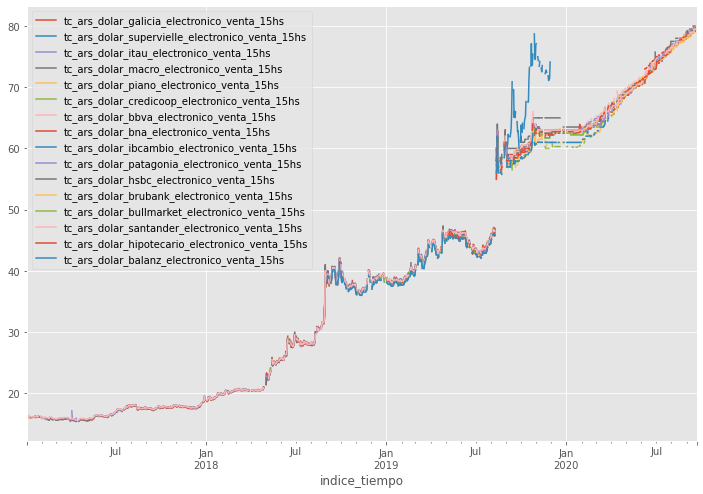

In [96]:
tcs.plot()

* Genera un reporte automatico en HTML que diga las ultimas temperaturas diarias y el promedio de los ultimos 30 dias, para 3 ciudades de Argentina

In [97]:
temperaturas_api = BASE_SERIES_API.format(
    ids=",".join([
        'temp_max_sarc',
        'temp_max_sane',
        'temp_max_saar',
    ])
)

print(temperaturas_api)

temperaturas = pd.read_csv(temperaturas_api)

https://apis.datos.gob.ar/series/api/series/?ids=temp_max_sarc,temp_max_sane,temp_max_saar&last=5000&format=csv


In [98]:
temperaturas['indice_tiempo'] = pd.to_datetime(temperaturas.indice_tiempo)
temperaturas = temperaturas.set_index('indice_tiempo')
temperaturas

,temperatura_maxima_sarc,temperatura_maxima_sane,temperatura_maxima_saar
indice_tiempo,,,
2018-11-17,29.8,37.2,26.0
2018-11-18,26.0,32.2,24.8
2018-11-19,26.2,30.7,27.8
2018-11-20,30.7,33.7,29.5
2018-11-21,32.5,35.2,33.5
...,...,...,...
2020-01-29,35.0,32.0,25.8
2020-01-30,27.7,NaN,NaN
2020-01-31,30.0,34.6,29.6


In [99]:
# como hay algunos dias sin valores, hay que especificar cual es la 
# cantidad minima de periodos aceptable para hacer el promedio de 30 dias
temperaturas_30d = temperaturas.rolling(30, min_periods=25).mean()
temperaturas_30d

,temperatura_maxima_sarc,temperatura_maxima_sane,temperatura_maxima_saar
indice_tiempo,,,
2018-11-17,NaN,NaN,NaN
2018-11-18,NaN,NaN,NaN
2018-11-19,NaN,NaN,NaN
2018-11-20,NaN,NaN,NaN
2018-11-21,NaN,NaN,NaN
...,...,...,...
2020-01-29,33.020000,35.303333,30.680000
2020-01-30,32.876667,35.279310,30.693103
2020-01-31,32.810000,35.251724,30.734483


In [100]:
fecha = arrow.get(temperaturas.index[-1]).format('YYYY-MM-DD')

corrientes_temp = temperaturas.loc[fecha, 'temperatura_maxima_sarc']
santiago_temp = temperaturas.loc[fecha, 'temperatura_maxima_sane']
rosario_temp = temperaturas.loc[fecha, 'temperatura_maxima_saar']

corrientes_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_sarc']
santiago_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_sane']
rosario_temp_30d = temperaturas_30d.loc[fecha, 'temperatura_maxima_saar']

In [101]:
reporte = f"""
=== TEMPERATURAS ===

Temperaturas maximas registradas al dia de {fecha} y 
promedio de maximas de los 30 dias anteriores.

* Corrientes: {corrientes_temp} (promedio 30d: {corrientes_temp_30d:.1f})
* Santiago del Estero: {santiago_temp} (promedio 30d: {santiago_temp_30d:.1f})
* Rosario: {rosario_temp} (promedio 30d: {rosario_temp_30d:.1f})

=====================
"""

In [102]:
html = markdown.markdown(reporte)
display(HTML(html))

* Grafica la relacion entre el nivel de precios (nucleo) y la base monetaria. Podes buscar la base monetaria en [este dataset](https://datos.gob.ar/dataset/sspm-factores-explicacion-base-monetaria/archivo/sspm_331.2) bajo el nombre de "Saldo de la base monetaria" y la serie de nivel de precios [es esta](https://datos.gob.ar/series/api/series/?ids=148.3_INUCLEONAL_DICI_M_19). Algunos scatter a probar:
    - IPC vs. base monetaria
    - IPC promedio 6 meses vs. base monetaria promedio 6 meses (Pista: usa rolling() y mean()).
    - IPC promedio 6 meses (variacion porcentual) vs. base monetaria promedio 6 meses (variacion porcentual) (Pista: agregale pct_change(1) al anterior).
    - IPC promedio 6 meses (variacion porcentual) vs. base monetaria promedio 6 meses (variacion porcentual) de hace 3 meses -rezago de 3 meses- (Pista: agregale shift(3) a una de las variables).
    
Que otras variables se podrian incorporar para explicar o controlar esta relacion? Nivel de actividad? Tipo de cambio? Tasa de interes?

In [103]:
m_ipc_api = BASE_SERIES_API.format(
    ids=",".join([
        '148.3_INUCLEONAL_DICI_M_19',
        '331.2_SALDO_BASERIA__15',
    ])
)

print(m_ipc_api)

m_ipc = pd.read_csv(m_ipc_api)

https://apis.datos.gob.ar/series/api/series/?ids=148.3_INUCLEONAL_DICI_M_19,331.2_SALDO_BASERIA__15&last=5000&format=csv


In [104]:
m_ipc = m_ipc.set_index('indice_tiempo')

In [105]:
m_ipc.tail()

,ipc_nucleo_nacional,saldo_base_monetaria
indice_tiempo,,
2020-04-01,308.3681,2.147121e+06
2020-05-01,313.3195,2.221676e+06
2020-06-01,320.5733,2.159028e+06
2020-07-01,328.6943,2.315228e+06
2020-08-01,338.6645,2.333887e+06


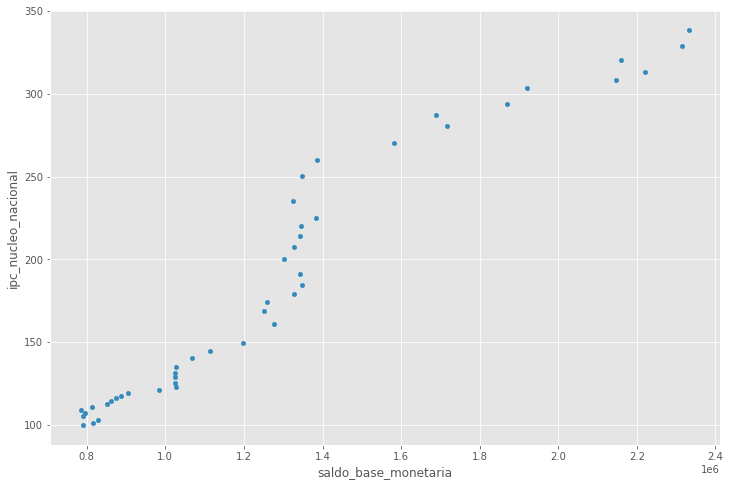

In [106]:
m_ipc.plot.scatter(
    'saldo_base_monetaria', 'ipc_nucleo_nacional'
)

In [107]:
m_ipc['m_rolling_6'] = m_ipc.saldo_base_monetaria.rolling(6).mean()
m_ipc['ipc_rolling_6'] = m_ipc.ipc_nucleo_nacional.rolling(6).mean()

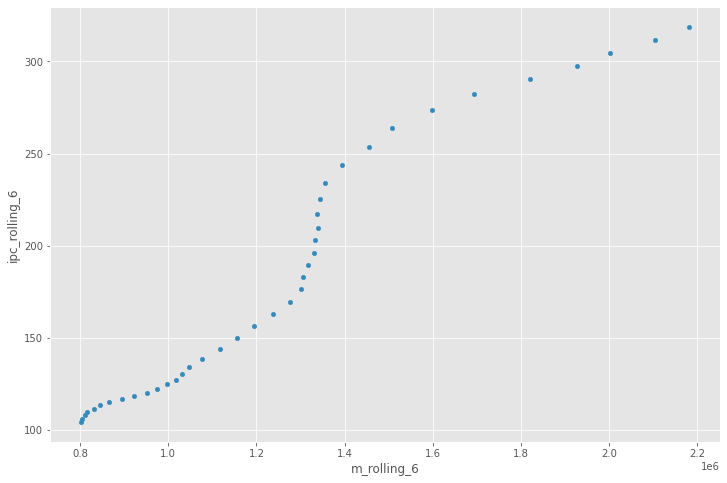

In [108]:
m_ipc.plot.scatter(
    'm_rolling_6', 'ipc_rolling_6'
)

In [109]:
m_ipc['m_roll_6_pct_var'] = m_ipc.saldo_base_monetaria.rolling(6).mean().pct_change(1)
m_ipc['ipc_roll_6_pct_var'] = m_ipc.ipc_nucleo_nacional.rolling(6).mean().pct_change(1)

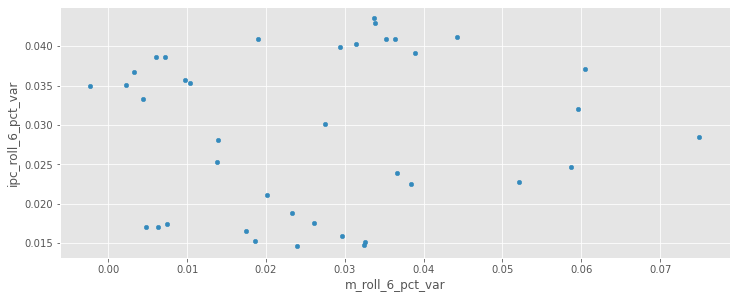

In [110]:
ax = m_ipc.plot.scatter(
    'm_roll_6_pct_var', 'ipc_roll_6_pct_var'
)

# para que eje X y eje Y tengan la misma escala
ax.set_aspect('equal')

In [111]:
m_ipc['ipc_roll_6_pct_var_shift_3'] = m_ipc.ipc_nucleo_nacional.rolling(6).mean().pct_change(1).shift(3)

In [112]:
# bonus track! con este codigo adicional 
# podes agregar la linea de equivalencia

# creas una nueva serie con los valores de la serie 
# que es indice del grafico (eje Y)
m_ipc['equal_line'] = m_ipc['ipc_roll_6_pct_var']

# creas un dataframe que tiene el mismo indice que el grafico
m_index = m_ipc.set_index('ipc_roll_6_pct_var')

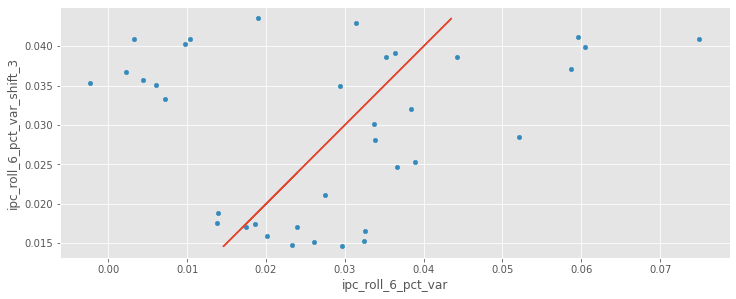

In [113]:
ax = m_ipc.plot.scatter(
    'm_roll_6_pct_var', 'ipc_roll_6_pct_var_shift_3'
)
ax.set_aspect('equal')

# agrega la linea de equivalencia, donde los valores del eje X
# son iguales a los del eje Y (NO es una linea de tendencia)
m_index.equal_line.plot(ax=ax)

### Bonus track: graficar una recta de regresion

Posiblemente te hayas preguntado haciendo los ejercicios anteriores como se puede graficar una recta de regresion _facilmente_.

Hay una libreria de graficos llamada `seaborn` que tiene muchos de estos graficos tipicos implementados para hacerlos con facilidad.

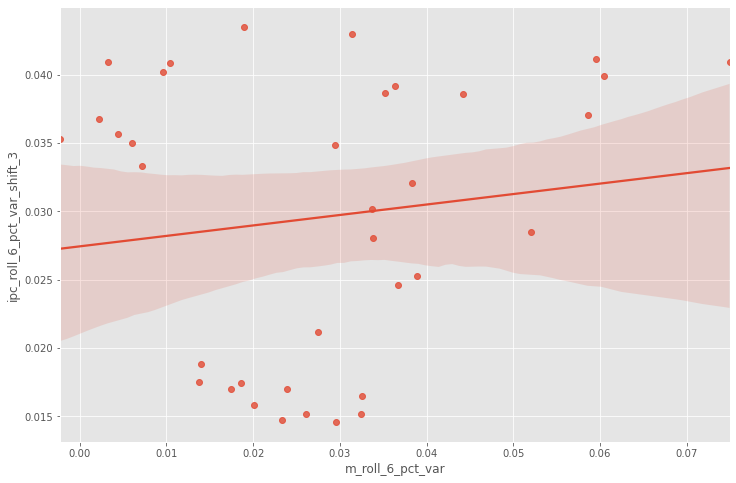

In [114]:
sns.regplot(m_ipc.m_roll_6_pct_var, m_ipc.ipc_roll_6_pct_var_shift_3)

## Ejercicio 2: API de Quandl

* Grafica las tasas de interes de los bonos de Estados Unidos, a partir del dataset de FRED disponible en Quandl (Pista: podes arrancar a buscar por aca: https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data?keyword=10%20years%20treasury)

In [115]:
BASE_QUANDL_API = 'https://www.quandl.com/api/v3/datasets/FRED/{serie_id}.csv?start_date=2010-01-01'

In [116]:
series_ids = ['DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS30']

In [117]:
def get_fred_serie(serie_id):
    # extrae la serie de Quandl
    api_call = BASE_QUANDL_API.format(serie_id=serie_id)
    df = pd.read_csv(api_call, index_col='Date').sort_index()
    
    # renombra con el id
    serie = df.Value
    serie.name = serie_id
    
    return serie

In [118]:
series = list(map(get_fred_serie, series_ids))

In [119]:
df_t = pd.concat(series, axis=1)
df_t.index = pd.to_datetime(df_t.index)
df_t

,DGS1,DGS2,DGS5,DGS10,DGS30
Date,,,,,
2010-01-04,0.45,1.09,2.65,3.85,4.65
2010-01-05,0.41,1.01,2.56,3.77,4.59
2010-01-06,0.40,1.01,2.60,3.85,4.70
2010-01-07,0.40,1.03,2.62,3.85,4.69
2010-01-08,0.37,0.96,2.57,3.83,4.70
...,...,...,...,...,...
2020-09-14,0.14,0.14,0.27,0.68,1.42
2020-09-15,0.13,0.14,0.27,0.68,1.43
2020-09-16,0.12,0.14,0.28,0.69,1.45


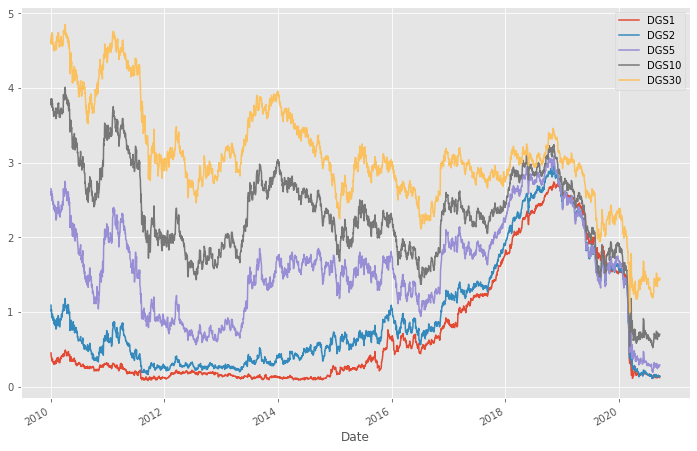

In [120]:
df_t.plot()

## Ejercicio 3: API de Banco Mundial

* Grafica la evolucion de las emisiones per capita de CO2 para por lo menos 8 paises paises de Sudamérica desde 1960 (o el primer año con datos).

In [121]:
BASE_BM_API = 'http://api.worldbank.org/v2/es/country/{pais}/indicator/{indicador}?format=json&per_page=20000'

In [122]:
paises = ['arg', 'bra', 'ury', 'chl', 'ven',
          'col', 'bol', 'ecu', 'per', 'pry']
indicadores = ['EN.ATM.CO2E.PC']

In [123]:
emisiones = requests.get(
    BASE_BM_API.format(
        pais=";".join(paises), 
        indicador=";".join(indicadores)
    )
).json()

In [124]:
df_emisiones = pd.json_normalize(emisiones[1])

In [125]:
df_emisiones_series = df_emisiones.pivot_table(
    index='date',
    columns='country.value',
    values='value'
)
df_emisiones_series

country.value,Argentina,Bolivia,Brasil,Chile,Colombia,Ecuador,Paraguay,Perú,Uruguay,Venezuela
date,,,,,,,,,,
1960,2.383343,0.274753,0.649886,1.658786,1.021927,0.388195,0.159855,0.804897,1.701589,7.009412
1961,2.458551,0.279281,0.662130,1.743013,1.099581,0.352251,0.185738,0.827360,1.602729,6.153191
1962,2.538446,0.289272,0.701776,1.973032,1.137456,0.325586,0.195532,0.927541,1.540660,6.188718
1963,2.330685,0.312894,0.706049,2.006374,1.205764,0.363070,0.199338,0.925178,1.639286,6.208591
1964,2.553442,0.374320,0.699884,1.986497,1.194411,0.421134,0.204534,1.077547,1.710100,6.041545
1965,2.656466,0.374066,0.676455,1.976348,1.222187,0.434252,0.253210,1.021691,2.049519,6.271782
1966,2.806896,0.410062,0.750375,2.053283,1.218990,0.448237,0.230139,1.100485,1.985092,5.690063
1967,2.871100,0.449588,0.751887,2.068180,1.245901,0.466288,0.212900,1.102449,1.776106,6.352986
1968,2.981777,0.506850,0.856554,2.241519,1.304525,0.544402,0.251023,1.138785,1.760313,6.132858


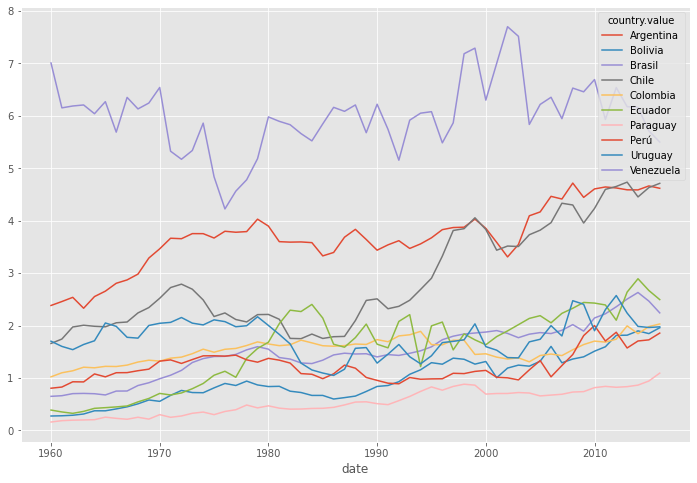

In [126]:
df_emisiones_series.plot()